In [19]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import random

import warnings
warnings.filterwarnings('ignore')

The dataset can be found [here](https://www.kaggle.com/datasets/himanshunakrani/student-study-hours)

In [61]:
df = pd.read_csv(r"C:\Jupyter Projects\Machine Learning\ML Lab\Week 3\studyHours.csv")
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


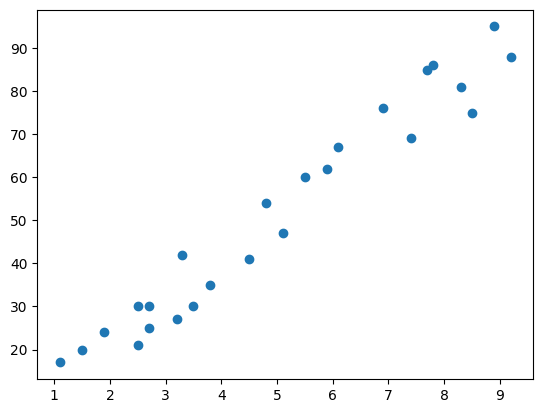

In [62]:
plt.scatter(data=df, x='Hours', y='Scores')

In [63]:
X = df.drop('Scores', axis=1)
y = df.Scores

In [64]:
X.head()

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5


In [95]:
X = X.flatten()

In [96]:
y.head()

0    21
1    47
2    27
3    75
4    30
Name: Scores, dtype: int64

In [97]:
y.shape

(25,)

In [98]:
def manual_linear_regression(X, y, learning_rate=0.01, iterations=1000, threshold=.80):
    # Initialize slope (m) and intercept (c) randomly
    m = np.random.rand()
    c = np.random.rand()
    
    n = len(X)  # Number of data points
    history = []  # To store the history of m, c, and R² score

    for i in range(iterations):
        # Predict y using the current m and c
        y_pred = m * X + c
        
        # Calculate the residuals (errors)
        error = y - y_pred
        
        # Calculate gradients
        m_gradient = -2 * np.sum(X * error) / n
        c_gradient = -2 * np.sum(error) / n
        
        # Update m and c using the gradients
        m -= learning_rate * m_gradient
        c -= learning_rate * c_gradient
        
        # Calculate R² score
        ssr = np.sum((y_pred - np.mean(y)) ** 2)
        sst = np.sum((y - np.mean(y)) ** 2)
        r2_score = 1 - (np.sum((y - y_pred) ** 2) / sst)
        
        # Store the values in the history
        history.append((m, c, r2_score))
        
        if r2_score > threshold:
            break
        print(f"Iteration: {iteration}")
        print(f"R2 Score: {r2_score}")
    
    return m, c, history

# Example usage:

m, c, history = manual_linear_regression(X, y, learning_rate=0.01, iterations=1000, threshold=.80)

print(f"Final slope (m): {m}")
print(f"Final intercept (c): {c}")
print(f"R² Score: {history[-1][2]}")

Iteration: 1
R2 Score: -3.8603360377953555
Iteration: 1
R2 Score: 0.3326221169782445
Final slope (m): 9.34124868171848
Final intercept (c): 2.388136726784088
R² Score: 0.873001710336505


In [77]:
from sklearn.linear_model import LinearRegression

In [78]:
linearReg = LinearRegression()

In [79]:
X.shape

(25,)

In [81]:
X = np.array(X).reshape(-1, 1)

In [82]:
X.shape

(25, 1)

In [83]:
linearReg.fit(X, y)

LinearRegression()

In [84]:
m = linearReg.coef_
c = linearReg.intercept_

In [85]:
m

array([9.77580339])

In [86]:
c

2.48367340537321

In [90]:
y_pred = linearReg.predict(X)

In [92]:
r2_score = linearReg.score(X, y_pred)

In [93]:
r2_score

1.0